In [6]:
# _______________________________________________
## Introduction
# _______________________________________________
# Creating a prognostic model from Wisconsin Breast Cancer Data 
# by Victor Wan
# Desc: Visualising Breast Cancer Wisconsin data and creating a predictive model based on nuclear features

# Importing libraries

print('Creating a prognostic model from Wisconsin Breast Cancer Data\n~by Victor Wan\nDesc: Visualising Breast Cancer Wisconsin data and creating a predictive model based on nuclear features')

# numpy is used to manipulate arrays (used in this project for .column_stack())
import numpy as np
# panda for data analysis (used for reading in data and converting to DataFrame)
import pandas as pd

import os, sys

# libraries for plotting data
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sb

# libraries for logistic regression
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report

import statsmodels.api as sm
import statsmodels.formula.api as smf

Creating a prognostic model from Wisconsin Breast Cancer Data
~by Victor Wan
Desc: Visualising Breast Cancer Wisconsin data and creating a predictive model based on nuclear features


# Setting graph styles

'C:\\Users\\victo\\Dropbox\\Coding\\Python\\visual_studio_code\\project_breast_cancer\\breast_cancer_data.csv'

In [20]:
# Setting graph styles
# %matplotlib inline
# rcParams['figure.figsize'] = 5, 4
print('Setting graph styles...')
sb.set_style('whitegrid')

# Locate and read data
print('Locating and reading data...')
address = os.path.realpath(
    os.path.join(os.getcwd(), 'breast_cancer_data.csv'))
df=pd.read_csv(__location__)
# column_names=["id","diagnosis","radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean","compactness_mean","concavity_mean","concave points_mean","symmetry_mean","fractal_dimension_mean","radius_se","texture_se","perimeter_se","area_se","smoothness_se","compactness_se","concavity_se","concave points_se","symmetry_se","fractal_dimension_se","radius_worst","texture_worst","perimeter_worst","area_worst","smoothness_worst","compactness_worst","concavity_worst","concave points_worst","symmetry_worst","fractal_dimension_worst"]
# df.columns=column_names
# used https://github.com/patrickmlong/Breast-Cancer-Wisconsin-Diagnostic-DataSet/blob/master/Breast%20Cancer%20Wisconsin%20(Diagnostic)%20DataSet_Orignal_Data_In_Progress.ipynb as a guide

Setting graph styles...
Locating and reading data...


In [21]:
# # define functions
# print('Defining functions...')
def avg(a):
    '''returns an average of counts stored in a series
    '''
    return(a/sum(a))
# def counts__df(a):
#      '''input a categorical variable and create a DataFrame of counts for each level of the categorical variable. 
#   '''

# def append_first_10_columns_to_tuple

# dummy function check whether numeric, if not numeric, modify to NA. 
# 
# 

def non_numeric_to_NA(col):
     '''Check whether a column's values are numeric, and if not numeric, modify to NA. 
     ''' 
     for id in range(568):
        if type(col[id]) == int or type(col[id]) == np.float64:
            pass
        else:
            col[id]=np.float64(col[id])

In [22]:
non_numeric_to_NA(df.texture_mean)
df.texture_mean

0      10.38
1      17.77
2      21.25
3      20.38
4      14.34
5      15.70
6      19.98
7      20.83
8      21.82
9      24.04
10     23.24
11     17.89
12     24.80
13     23.95
14     22.61
15     27.54
16     20.13
17     20.68
18     22.15
19     14.36
20     15.71
21     12.44
22     14.26
23     23.04
24     21.38
25     16.40
26     21.53
27     20.25
28     25.27
29     15.05
       ...  
539    25.44
540    14.44
541    24.99
542    25.42
543    28.06
544    20.70
545    23.23
546    16.35
547    16.58
548    19.34
549    24.21
550    21.48
551    22.44
552    29.43
553    21.94
554    28.92
555    27.61
556    19.59
557    27.88
558    22.68
559    23.93
560    27.15
561    29.37
562    30.62
563    25.09
564    22.39
565    28.25
566    28.08
567    29.33
568    24.54
Name: texture_mean, Length: 569, dtype: float64

In [23]:
## creating string and binary diagnosis variables
# saving string version of Diagnosis for future reference (when plotting)
diagnosis_str = df.diagnosis
# remapping M and B to 1 and 0 respectively
diagnosis_coder = {'M':1, 'B':0}
df.diagnosis = df.diagnosis.map(diagnosis_coder)
diagnosis_int = df.diagnosis
# create separate dataframes for graphing later on
df_b = df[df['diagnosis'] == 0]
df_m = df[df['diagnosis'] == 1]

In [24]:
# dropping unnecessary columns
# ID is not necessary for analysis, diagnosis is removed for rearranging, Unnamed: 32 is an unknown column. 
df.drop(['id', 'diagnosis', 'Unnamed: 32'], axis = 1, inplace = True)
df['diagnosis'] = diagnosis_int
# peeking at data
print('Peeking at data...')
print(df.head())
print(df.info())

Peeking at data...
   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave_points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean    ...      texture_worst  perimeter_worst  \
0

Visualising data...
Visualising the proportion of benign and malignant cases...
   diagnosis    percent
0        357  62.741652
1        212  37.258348
There are more benign than malignant cases in the Wisconsin dataset


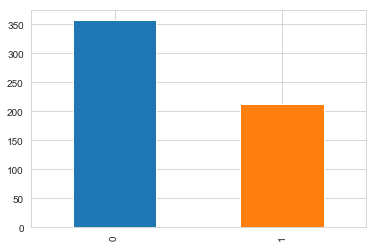

In [25]:
# _______________________________________________
## Visualise data
# _______________________________________________
print('Visualising data...')
print('Visualising the proportion of benign and malignant cases...')
diagnosis_value_counts=df['diagnosis'].value_counts()
t_diagnosis=pd.DataFrame(diagnosis_value_counts)
t_diagnosis['percent']=100*avg(diagnosis_value_counts)
print(t_diagnosis)
diagnosis_value_counts.plot(kind='bar')
print('There are more benign than malignant cases in the Wisconsin dataset')

In [26]:
# Create list of df column names
mean_features = []
for column in df.columns[0:10]:
     mean_features.append(column)

In [27]:
# Create dataframe where only mean features and diagnosis are included
df_10 = df.loc[:,mean_features]
df_10['diagnosis_str']=diagnosis_str

Creating pairplot of data...


C:\Users\victo\AppData\Roaming\Python\Python37\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


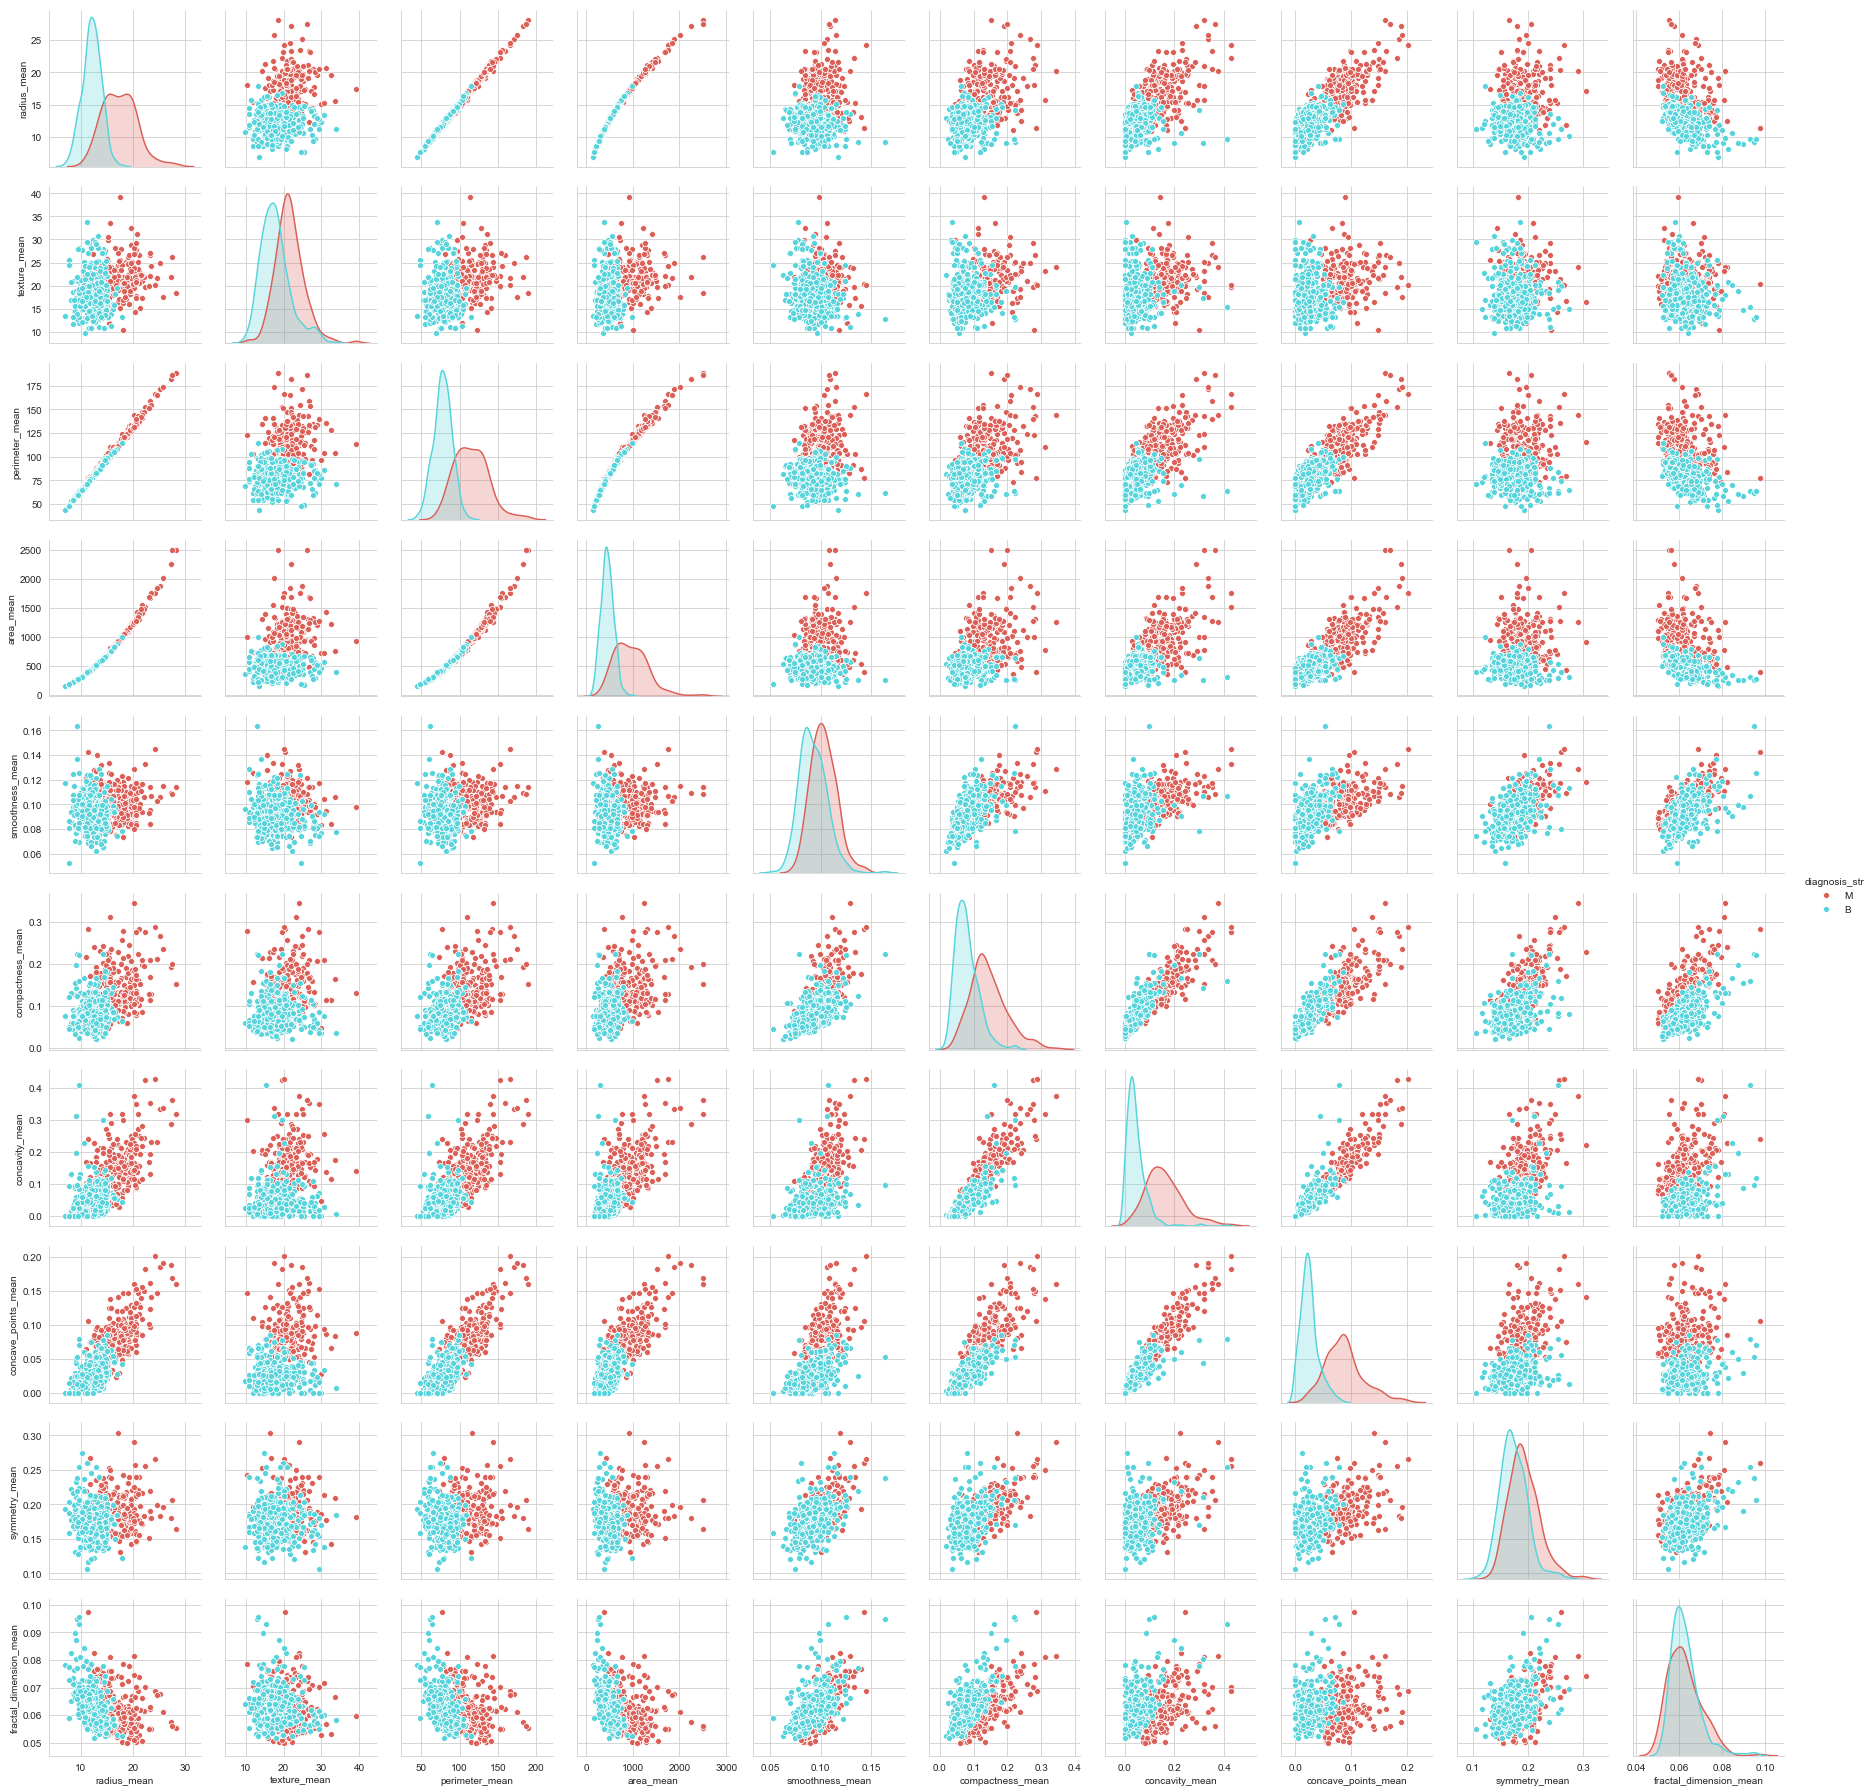

In [28]:
# creating a pairplot of data
print('Creating pairplot of data...')
sb.pairplot(df_10, hue='diagnosis_str', palette='hls')
plt.show()

Creating histograms showing distribution when separated by benign and malignant cases...


No handles with labels found to put in legend.


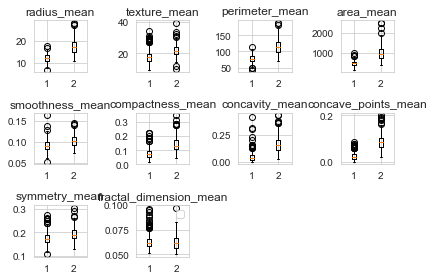

Plots show distinct patterns
1. radius/area/perimeter/compactness/concavity/concave_points features have distinct Bemign and Malignant populations
2. Smoothness/symmetry are very homogenous
Concavity and concave_points seem to have the strongest positive relationship with other variables.


In [29]:
# Creating a matrix of boxplots for mean features
print('Creating histograms showing distribution when separated by benign and malignant cases...')
fig = plt.figure()
for i,b in enumerate(list(df.columns[0:10])):
    # enumerate starts at index 0, need to add 1 for subplotting
    i +=1
    # creating subplots
    ax = fig.add_subplot(3,4,i)
    ax.boxplot([df_b[b], df_m[b]])
    ax.set_title(b)
plt.tight_layout()
plt.legend()
plt.show()
print('Plots show distinct patterns\n1. radius/area/perimeter/compactness/concavity/concave_points features have distinct Bemign and Malignant populations\n2. Smoothness/symmetry are very homogenous\nConcavity and concave_points seem to have the strongest positive relationship with other variables.')


In [30]:
# _______________________________________________
## Logistic Regression
# _______________________________________________
print('Performing logistic regression analysis...')
# creating a tuple dataframe for the first 10 columns of df (ie. the columns which show mean characteristics). 
columns_1_to_10_list = []
for column in range(10):
    columns_1_to_10_list.append(df.iloc[:,column])
columns_1_to_10_tuple = tuple(columns_1_to_10_list)

# defining the x and y variables for logistic regression
y = diagnosis_int
x = np.column_stack(columns_1_to_10_tuple)
x = sm.add_constant(x,prepend=True)

# creating logistic regression
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)
logreg = LogisticRegression().fit(x_train,y_train)
logreg
print("Training set score: {:.3f}".format(logreg.score(x_train,y_train)))
print("Test set score: {:.3f}".format(logreg.score(x_test,y_test)))

# create a confusion matrix
y_predict = logreg.predict(x_test)
print(classification_report(y_test,y_predict))

# cross validating
scores = cross_val_score(logreg, x_train, y_train, cv=5)
scores

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

print('\nConducted logistic regression because the output only has two possibilities. The model does not assume normal distrubution, which is ideal as the pair plot shows some skewed distributions.\nA random forest would also have worked but a logistic regression is faster and more interpretable. This is significant considering the size of the dataframe.\nAlso the accuracy is high whilst the sd of the accuracy is small') 

Performing logistic regression analysis...
Training set score: 0.906
Test set score: 0.923
             precision    recall  f1-score   support

          0       0.93      0.94      0.94        90
          1       0.90      0.89      0.90        53

avg / total       0.92      0.92      0.92       143

Accuracy: 0.90 (+/- 0.07)

Conducted logistic regression because the output only has two possibilities. The model does not assume normal distrubution, which is ideal as the pair plot shows some skewed distributions.
A random forest would also have worked but a logistic regression is faster and more interpretable. This is significant considering the size of the dataframe.
Also the accuracy is high whilst the sd of the accuracy is small


In [31]:
if type(df.iloc[1,5]) == int or type(df.iloc[1,5]) == np.float64:
    print('ok')
else:
    print('nok')

ok


In [32]:
type(df.iloc[1,5])

numpy.float64